# Лабораторная работа №1.

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,645,86,44,77,155,60,7,152,44,19,141,174,345,161,72,9,0,187,192
1,215,90,39,86,169,62,7,162,41,20,131,194,388,147,74,1,22,185,191
2,34,87,38,85,177,61,8,164,40,20,129,186,402,130,63,1,25,198,205
3,507,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198
4,325,82,44,63,123,54,7,151,45,19,147,166,329,185,81,3,4,179,182
5,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
6,38,106,53,98,176,54,10,216,31,24,171,235,691,218,74,1,9,187,197
7,334,107,57,102,184,55,7,234,28,26,171,243,822,229,77,7,11,187,187
8,725,91,37,76,138,55,8,132,51,18,135,157,256,124,69,0,12,191,192
9,165,103,54,91,179,57,11,220,31,25,170,220,707,198,72,1,32,186,198


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.318761,93.806922,45.043716,82.469945,169.581056,61.712204,8.528233,169.979964,40.686703,20.679417,148.324226,189.612022,445.994536,175.342441,72.440801,6.393443,12.591985,188.956284,195.622951
std,239.991253,8.424367,6.152703,15.706870,33.819930,8.036246,4.526647,33.757043,7.806056,2.641464,14.532011,31.806737,180.226312,32.502544,7.717802,5.001280,9.034464,6.172542,7.548741
min,0.000000,76.000000,34.000000,44.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,59.000000,0.000000,0.000000,177.000000,182.000000
25%,211.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,415.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,71.000000,6.000000,11.000000,189.000000,196.000000
75%,613.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,159.000000,219.000000,605.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train_pd)
X_test_normalized = scaler.fit_transform(X_test)
print(X_train_pd)

      0   1   2   3    4   5   6    7   8   9    10   11   12   13  14  15  \
0    645  86  44  77  155  60   7  152  44  19  141  174  345  161  72   9   
1    215  90  39  86  169  62   7  162  41  20  131  194  388  147  74   1   
2     34  87  38  85  177  61   8  164  40  20  129  186  402  130  63   1   
3    507  93  35  78  162  60   8  150  45  19  125  172  331  137  67   2   
4    325  82  44  63  123  54   7  151  45  19  147  166  329  185  81   3   
..   ...  ..  ..  ..  ...  ..  ..  ...  ..  ..  ...  ...  ...  ...  ..  ..   
544   22  94  43  64  173  69   7  150  43  19  142  169  344  177  68   9   
545  416  89  44  70  158  64   6  141  47  18  143  164  299  173  66   9   
546  716  97  41  88  184  59   9  175  38  21  140  192  459  147  63   1   
547  611  90  49  85  141  57  11  159  43  20  167  173  365  186  75   1   
548  157  93  42  70  131  56   7  127  53  18  145  156  240  152  74   5   

     16   17   18  
0     0  187  192  
1    22  185  191  
2  

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
params = {'penalty': ('l2', None), 'max_iter': [500, 1000, 2000, 5000]}
gs = GridSearchCV(clf, params)
gs.fit(X_train_normalized, y_train)
gs.score(X_test_normalized, y_test)
print(gs.best_score_)
print(gs.best_params_)

0.7923769808173479
{'max_iter': 500, 'penalty': None}


#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA).

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_pd)
explained_variance_ratio = (pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(explained_variance_ratio)

print("\nНакопленная объясненная дисперсия:")
for n_components in [6, 7, 8, 9]:
    if n_components <= len(cumulative_variance):
        print(f"Первые {n_components} компонент: {cumulative_variance[n_components-1]:.4f} ({cumulative_variance[n_components-1]*100:.2f}%)")



Накопленная объясненная дисперсия:
Первые 6 компонент: 0.9455 (94.55%)
Первые 7 компонент: 0.9621 (96.21%)
Первые 8 компонент: 0.9727 (97.27%)
Первые 9 компонент: 0.9826 (98.26%)


#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [ ]:
pca = PCA(n_components=0.9)
X_train_normalized_pca = pca.fit_transform(X_train_normalized)
X_test_normalized_pca = pca.transform(X_test_normalized)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score.

МНОГОКЛАССОВАЯ ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ (k=4) НА PCA-ДАННЫХ

1. Анализ классов...
   Количество классов: 4
   Классы: ['bus' 'opel' 'saab' 'van']

   Распределение классов:
   ------------------------------
Класс      Train      Test      
   ------------------------------
bus        144        (26.2%)  74         (24.9%)
opel       144        (26.2%)  68         (22.9%)
saab       133        (24.2%)  84         (28.3%)
van        128        (23.3%)  71         (23.9%)

2. Настройка параметров GridSearchCV...
   Всего комбинаций: 180

3. Настройка метрик оценки...

4. Запуск GridSearchCV...
   Выполняется кросс-валидация...
Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



   GridSearchCV завершен!

РЕЗУЛЬТАТЫ GRIDSEARCHCV ДЛЯ МНОГОКЛАССОВОЙ ЗАДАЧИ

Лучшие параметры:
  C: 10
  class_weight: balanced
  max_iter: 1000
  multi_class: multinomial
  penalty: l2
  solver: lbfgs

Лучшая оценка (ROC-AUC OVR weighted): 0.7205

ОЦЕНКА МНОГОКЛАССОВОЙ МОДЕЛИ

7. Метрики качества для многоклассовой задачи:

--------------------------------------------------
Метрика                   Train      Test      
--------------------------------------------------
Accuracy                  0.4645     0.4747
F1-Score (micro)          0.4645     0.4747
F1-Score (macro)          0.4575     0.4601
F1-Score (weighted)       0.4548     0.4614
ROC-AUC OVR (weighted)    0.7332     0.7427

ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ (Classification Report)

Classification Report для test данных:
              precision    recall  f1-score   support

   Class_bus       0.46      0.59      0.52        74
  Class_opel       0.37      0.24      0.29        68
  Class_saab       0.47      0.40      0.44   

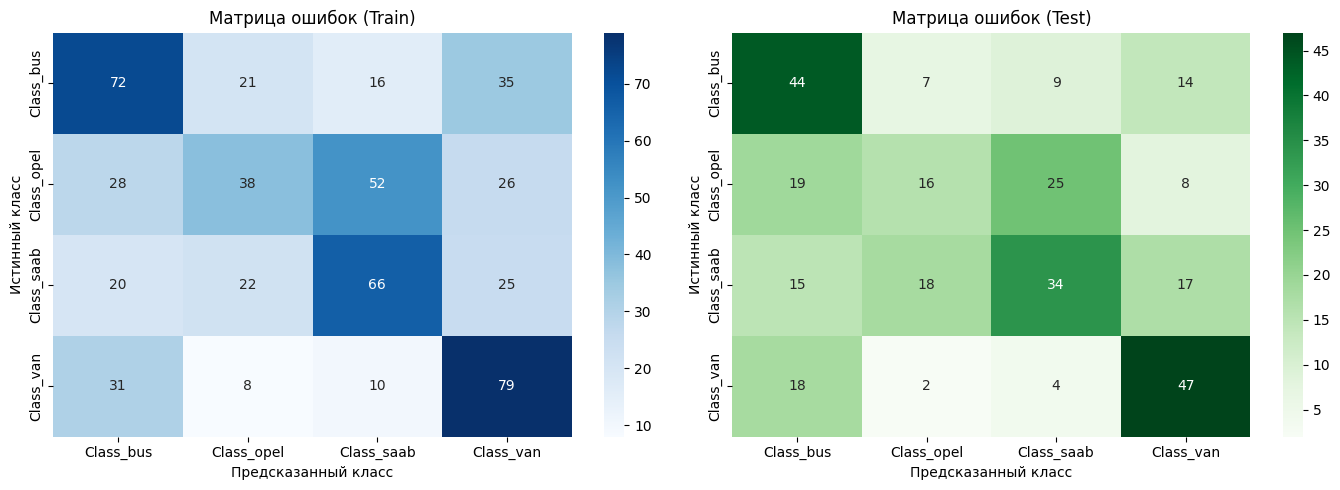


ROC-КРИВЫЕ ДЛЯ КАЖДОГО КЛАССА (One-vs-Rest)


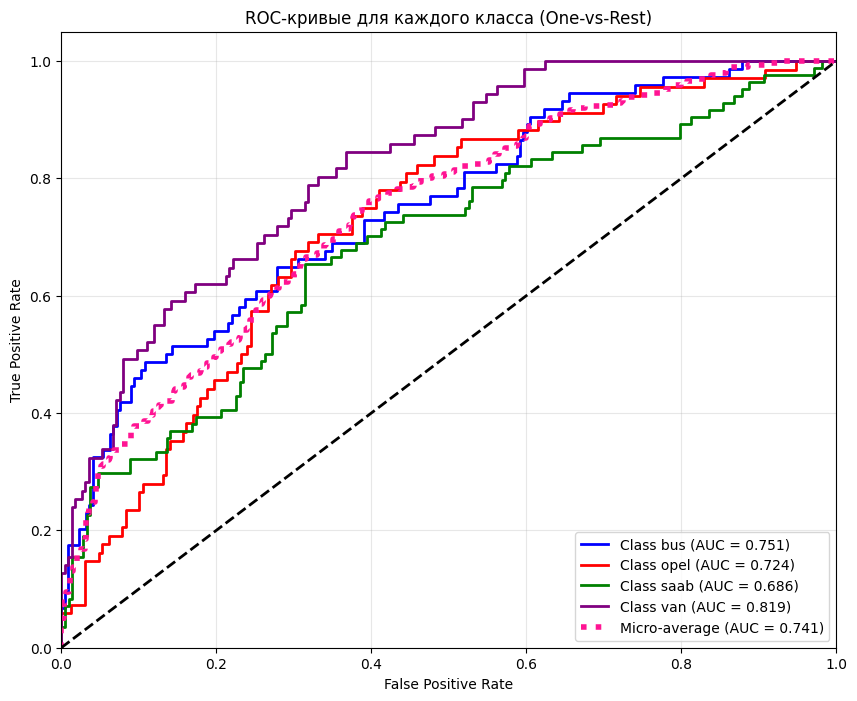


PRECISION-RECALL КРИВЫЕ ДЛЯ КАЖДОГО КЛАССА


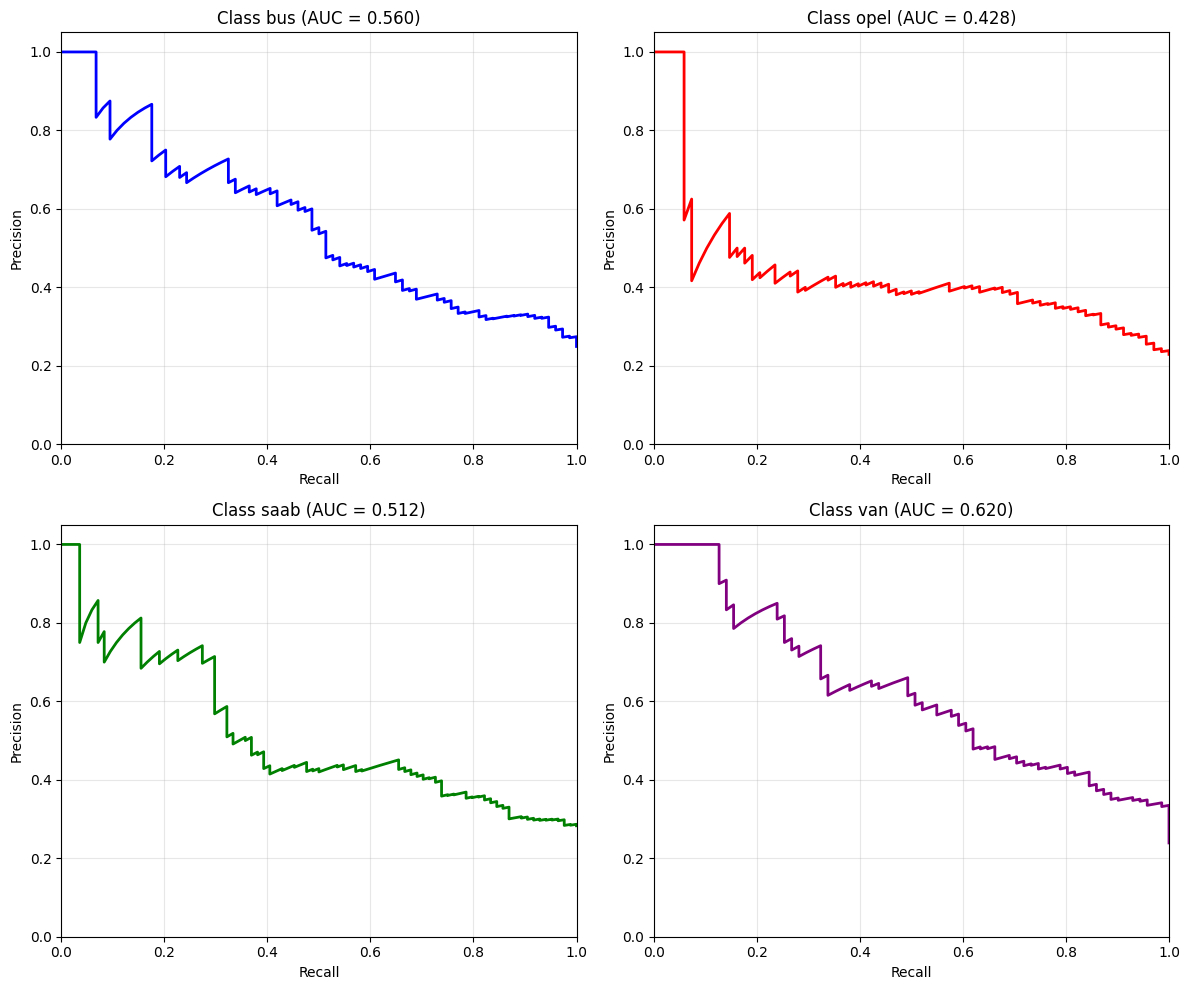


АНАЛИЗ КОЭФФИЦИЕНТОВ МОДЕЛИ ПО КЛАССАМ

Размер матрицы коэффициентов: (4, 5)
(Классы × Признаки): 4 × 5

Класс bus - Топ-5 важных компонент:
  1. PC2: -1.6499
  2. PC5: -1.5804
  3. PC4: 1.0216
  4. PC1: 0.1374
  5. PC3: -0.0115

Класс opel - Топ-5 важных компонент:
  1. PC5: 1.0026
  2. PC4: 0.7748
  3. PC1: 0.7186
  4. PC2: 0.3418
  5. PC3: -0.1654

Класс saab - Топ-5 важных компонент:
  1. PC5: 1.6324
  2. PC2: 1.2690
  3. PC1: 0.8814
  4. PC3: 0.4704
  5. PC4: 0.2456

Класс van - Топ-5 важных компонент:
  1. PC4: -2.0420
  2. PC1: -1.7375
  3. PC5: -1.0546
  4. PC3: -0.2935
  5. PC2: 0.0391


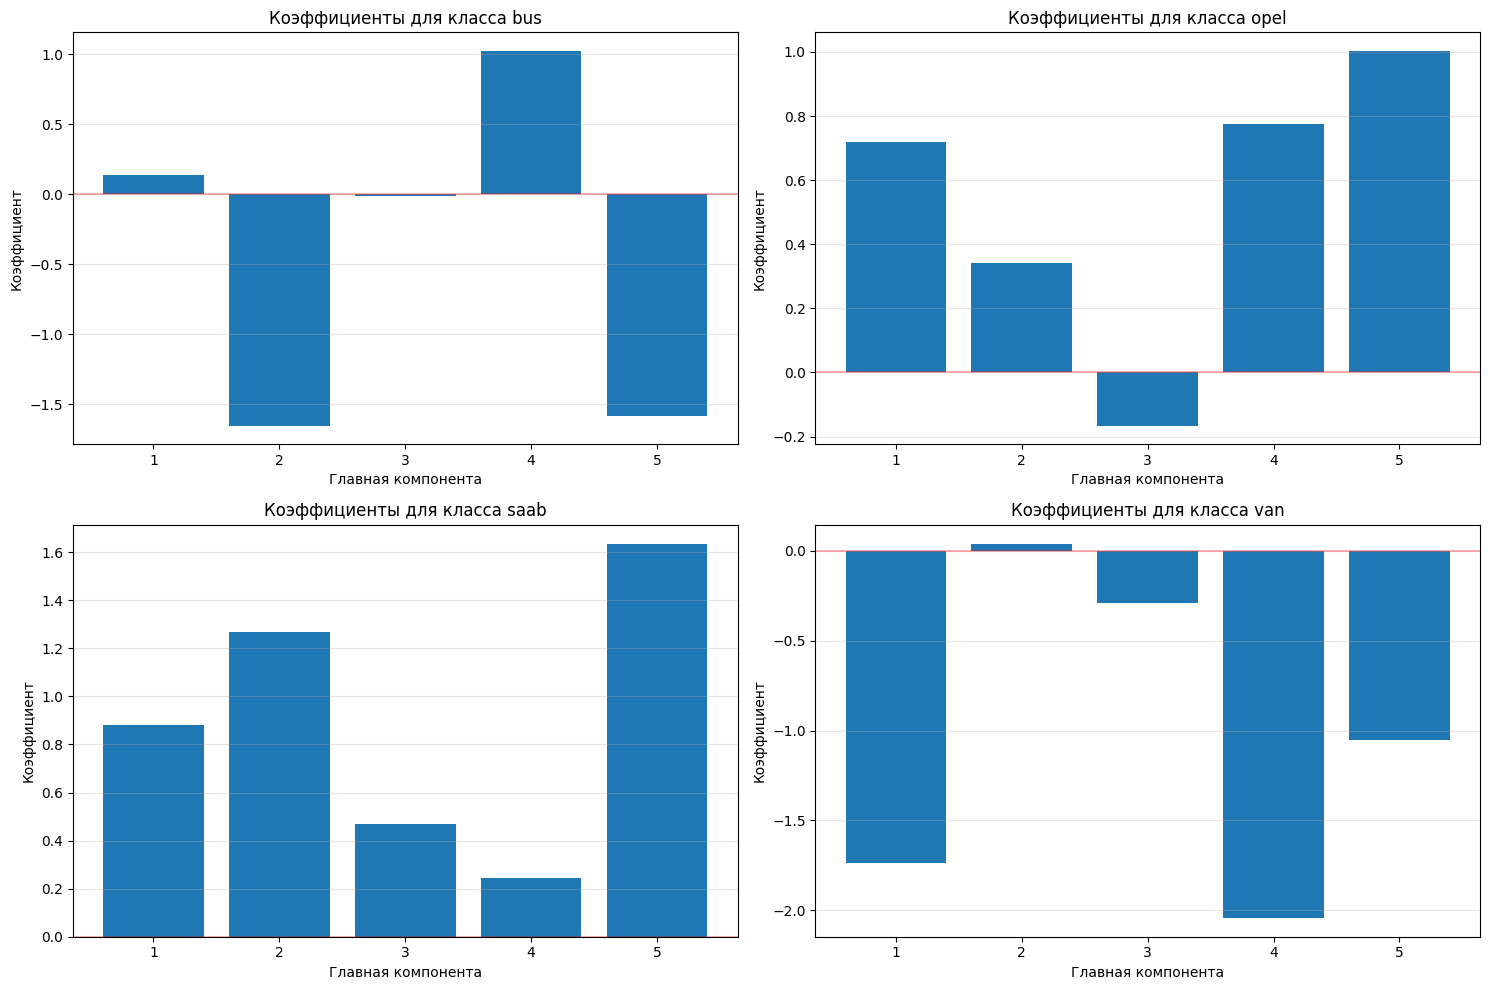


СРАВНЕНИЕ МЕТРИК ПО КЛАССАМ

Метрики по классам (test данные):
Class  Accuracy  Precision   Recall  F1-Score
  bus  0.723906   0.458333 0.594595  0.517647
 opel  0.734007   0.372093 0.235294  0.288288
 saab  0.703704   0.472222 0.404762  0.435897
  van  0.787879   0.546512 0.661972  0.598726

РАСПРЕДЕЛЕНИЕ ВЕРОЯТНОСТЕЙ ПРЕДСКАЗАНИЙ


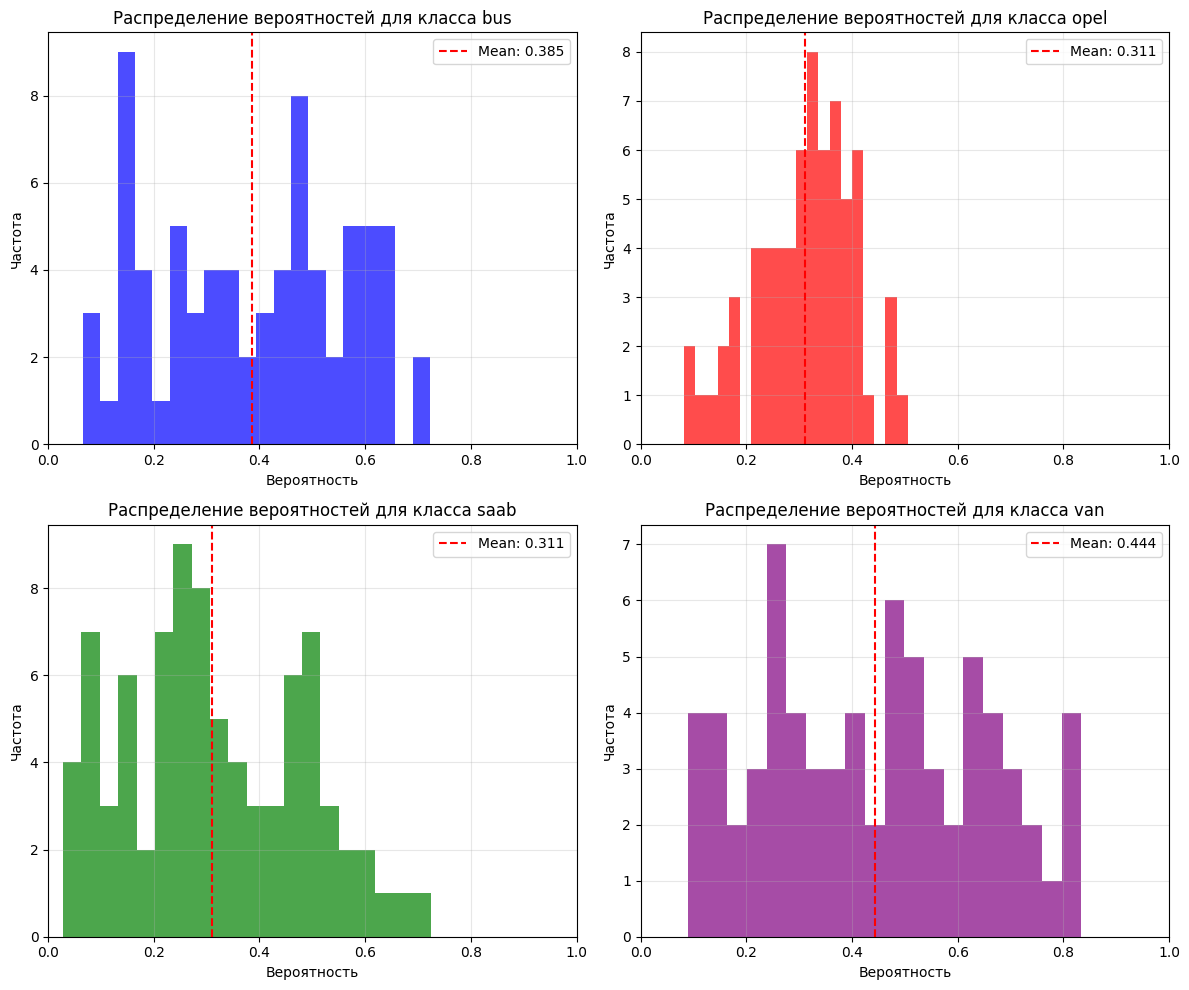


ИТОГОВЫЕ ВЫВОДЫ ДЛЯ МНОГОКЛАССОВОЙ ЗАДАЧИ

1. Общее качество модели:
   • Test Accuracy: 0.4747
   • Test F1-Score (weighted): 0.4614
   • Test ROC-AUC OVR: 0.7427

2. Баланс классов:
   ⚠ Есть дисбаланс в качестве по классам (std F1: 0.132)

3. Разница между train и test:
   ✓ Модель хорошо обобщается (разница accuracy: -0.010)

4. Наиболее проблемные классы:
   • Класс opel: F1-Score = 0.288

5. Лучшие параметры модели:
   • C: 10
   • class_weight: balanced
   • max_iter: 1000
   • multi_class: multinomial
   • penalty: l2
   • solver: lbfgs

АНАЛИЗ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ ЗАВЕРШЕН!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                           accuracy_score, f1_score, classification_report,
                           confusion_matrix, precision_recall_curve,
                           precision_score, recall_score)
from sklearn.preprocessing import label_binarize
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd

# Подавляем предупреждения о сходимости
warnings.filterwarnings("ignore", category=ConvergenceWarning)

print("="*70)
print("МНОГОКЛАССОВАЯ ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ (k=4) НА PCA-ДАННЫХ")
print("="*70)

# 1. ПРОВЕРКА КЛАССОВ И ИХ БАЛАНСА
print("\n1. Анализ классов...")
classes = np.unique(y_train)
n_classes = len(classes)
print(f"   Количество классов: {n_classes}")
print(f"   Классы: {classes}")

# Распределение классов в train и test
print("\n   Распределение классов:")
print("   " + "-"*30)
print(f"{'Класс':<10} {'Train':<10} {'Test':<10}")
print("   " + "-"*30)
for cls in classes:
    train_count = np.sum(y_train == cls)
    test_count = np.sum(y_test == cls)
    train_pct = train_count / len(y_train) * 100
    test_pct = test_count / len(y_test) * 100
    print(f"{cls:<10} {train_count:<10} ({train_pct:.1f}%)  {test_count:<10} ({test_pct:.1f}%)")

# 2. НАСТРОЙКА ПАРАМЕТРОВ ДЛЯ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ
print("\n2. Настройка параметров GridSearchCV...")

# Для многоклассовой классификации важно правильно настроить solver
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
    'penalty': ['l2'],  # L2 лучше для многоклассовой
    'solver': ['lbfgs', 'newton-cg', 'saga'],  # Поддерживают multinomial
    'max_iter': [1000, 2000, 5000],
    'class_weight': [None, 'balanced'],
    'multi_class': ['multinomial', 'ovr']  # Стратегия для многоклассовой классификации
}

print(f"   Всего комбинаций: {np.prod([len(v) for v in param_grid.values()])}")

# 3. НАСТРОЙКА МЕТРИК ДЛЯ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ
print("\n3. Настройка метрик оценки...")

# Для многоклассовой ROC-AUC нужно использовать стратегию 'ovr' или 'ovo'
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',  # Взвешенный F1-score
    'roc_auc_ovr': 'roc_auc_ovr',  # ROC-AUC для многоклассовой (One-vs-Rest)
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted'
}

# 4. ВЫПОЛНЕНИЕ GRIDSEARCHCV
print("\n4. Запуск GridSearchCV...")

# Используем стратифицированную кросс-валидацию
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем GridSearchCV с multi_class='auto' для автоматического выбора стратегии
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=2000),
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='roc_auc_ovr_weighted',  # Используем взвешенный ROC-AUC
    n_jobs=-1,
    verbose=1,
    refit=True  # Переобучаем модель с лучшими параметрами
)

print("   Выполняется кросс-валидация...")
grid_search.fit(X_train_normalized_pca, y_train)

print("\n   GridSearchCV завершен!")

# 5. АНАЛИЗ РЕЗУЛЬТАТОВ
print("\n" + "="*70)
print("РЕЗУЛЬТАТЫ GRIDSEARCHCV ДЛЯ МНОГОКЛАССОВОЙ ЗАДАЧИ")
print("="*70)

print(f"\nЛучшие параметры:")
best_params = grid_search.best_params_
for param, value in best_params.items():
    print(f"  {param}: {value}")

print(f"\nЛучшая оценка (ROC-AUC OVR weighted): {grid_search.best_score_:.4f}")

# 6. ОБУЧЕНИЕ И ОЦЕНКА ФИНАЛЬНОЙ МОДЕЛИ
print("\n" + "="*70)
print("ОЦЕНКА МНОГОКЛАССОВОЙ МОДЕЛИ")
print("="*70)

best_model = grid_search.best_estimator_

# Предсказания
y_train_pred = best_model.predict(X_train_normalized_pca)
y_test_pred = best_model.predict(X_test_normalized_pca)

# Вероятности для каждого класса
y_train_proba = best_model.predict_proba(X_train_normalized_pca)
y_test_proba = best_model.predict_proba(X_test_normalized_pca)

# 7. МЕТРИКИ КАЧЕСТВА (МНОГОКЛАССОВЫЕ)
print("\n7. Метрики качества для многоклассовой задачи:")

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# F1-Score (micro, macro, weighted)
train_f1_micro = f1_score(y_train, y_train_pred, average='micro')
test_f1_micro = f1_score(y_test, y_test_pred, average='micro')

train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')

train_f1_weighted = f1_score(y_train, y_train_pred, average='weighted')
test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')

# ROC-AUC для многоклассовой (One-vs-Rest)
train_roc_auc_ovr = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')
test_roc_auc_ovr = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')

print("\n" + "-"*50)
print(f"{'Метрика':<25} {'Train':<10} {'Test':<10}")
print("-"*50)
print(f"{'Accuracy':<25} {train_accuracy:.4f}     {test_accuracy:.4f}")
print(f"{'F1-Score (micro)':<25} {train_f1_micro:.4f}     {test_f1_micro:.4f}")
print(f"{'F1-Score (macro)':<25} {train_f1_macro:.4f}     {test_f1_macro:.4f}")
print(f"{'F1-Score (weighted)':<25} {train_f1_weighted:.4f}     {test_f1_weighted:.4f}")
print(f"{'ROC-AUC OVR (weighted)':<25} {train_roc_auc_ovr:.4f}     {test_roc_auc_ovr:.4f}")

# 8. ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ
print("\n" + "="*70)
print("ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ (Classification Report)")
print("="*70)

print("\nClassification Report для test данных:")
print(classification_report(y_test, y_test_pred, target_names=[f'Class_{i}' for i in classes]))

# 9. МАТРИЦА ОШИБОК (CONFUSION MATRIX)
print("\n" + "="*70)
print("МАТРИЦА ОШИБОК (CONFUSION MATRIX)")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Матрица ошибок для train
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=[f'Class_{i}' for i in classes],
            yticklabels=[f'Class_{i}' for i in classes])
axes[0].set_title('Матрица ошибок (Train)')
axes[0].set_xlabel('Предсказанный класс')
axes[0].set_ylabel('Истинный класс')

# Матрица ошибок для test
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=[f'Class_{i}' for i in classes],
            yticklabels=[f'Class_{i}' for i in classes])
axes[1].set_title('Матрица ошибок (Test)')
axes[1].set_xlabel('Предсказанный класс')
axes[1].set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

# 10. ROC-КРИВЫЕ ДЛЯ МНОГОКЛАССОВОЙ ЗАДАЧИ
print("\n" + "="*70)
print("ROC-КРИВЫЕ ДЛЯ КАЖДОГО КЛАССА (One-vs-Rest)")
print("="*70)

# Бинаризуем метки для построения ROC-кривых
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Вычисляем ROC-кривую и AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Вычисляем micro-average ROC-кривую
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_test_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Построение ROC-кривых для каждого класса
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown'][:n_classes]

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.3f})')

# Micro-average ROC-кривая
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 11. ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: PR-КРИВЫЕ ПО КЛАССАМ
print("\n" + "="*70)
print("PRECISION-RECALL КРИВЫЕ ДЛЯ КАЖДОГО КЛАССА")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_test_proba[:, i])
    pr_auc = auc(recall, precision)

    axes[i].plot(recall, precision, color=colors[i], lw=2)
    axes[i].set_xlabel('Recall')
    axes[i].set_ylabel('Precision')
    axes[i].set_title(f'Class {classes[i]} (AUC = {pr_auc:.3f})')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()

# 12. АНАЛИЗ КОЭФФИЦИЕНТОВ ПО КЛАССАМ
print("\n" + "="*70)
print("АНАЛИЗ КОЭФФИЦИЕНТОВ МОДЕЛИ ПО КЛАССАМ")
print("="*70)

coefficients = best_model.coef_
n_features = coefficients.shape[1]

print(f"\nРазмер матрицы коэффициентов: {coefficients.shape}")
print(f"(Классы × Признаки): {n_classes} × {n_features}")

# Визуализация коэффициентов для каждого класса
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, cls in enumerate(classes):
    ax = axes[i]
    ax.bar(range(1, n_features + 1), coefficients[i])
    ax.set_xlabel('Главная компонента')
    ax.set_ylabel('Коэффициент')
    ax.set_title(f'Коэффициенты для класса {cls}')
    ax.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    ax.grid(True, alpha=0.3, axis='y')

    # Находим наиболее важные компоненты для этого класса
    important_idx = np.argsort(np.abs(coefficients[i]))[::-1][:5]
    print(f"\nКласс {cls} - Топ-5 важных компонент:")
    for j, idx in enumerate(important_idx, 1):
        print(f"  {j}. PC{idx+1}: {coefficients[i][idx]:.4f}")

plt.tight_layout()
plt.show()

# 13. СРАВНЕНИЕ РЕЗУЛЬТАТОВ ПО КЛАССАМ
print("\n" + "="*70)
print("СРАВНЕНИЕ МЕТРИК ПО КЛАССАМ")
print("="*70)

# Вычисляем метрики для каждого класса отдельно
class_metrics = []
for cls in classes:
    # Создаем бинарные метки для текущего класса
    y_test_cls = (y_test == cls).astype(int)
    y_pred_cls = (y_test_pred == cls).astype(int)

    # Метрики для текущего класса
    accuracy = accuracy_score(y_test_cls, y_pred_cls)
    precision = precision_score(y_test_cls, y_pred_cls, zero_division=0)
    recall = recall_score(y_test_cls, y_pred_cls, zero_division=0)
    f1 = f1_score(y_test_cls, y_pred_cls, zero_division=0)

    class_metrics.append({
        'Class': cls,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Создаем DataFrame с метриками по классам
metrics_df = pd.DataFrame(class_metrics)
print("\nМетрики по классам (test данные):")
print(metrics_df.to_string(index=False))

# 14. ВИЗУАЛИЗАЦИЯ РАСПРЕДЕЛЕНИЯ ВЕРОЯТНОСТЕЙ
print("\n" + "="*70)
print("РАСПРЕДЕЛЕНИЕ ВЕРОЯТНОСТЕЙ ПРЕДСКАЗАНИЙ")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, cls in enumerate(classes):
    # Вероятности для текущего класса
    probas = y_test_proba[y_test == cls, i]

    axes[i].hist(probas, bins=20, alpha=0.7, color=colors[i])
    axes[i].set_xlabel('Вероятность')
    axes[i].set_ylabel('Частота')
    axes[i].set_title(f'Распределение вероятностей для класса {cls}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0, 1])

    # Статистика
    mean_prob = np.mean(probas)
    std_prob = np.std(probas)
    axes[i].axvline(x=mean_prob, color='red', linestyle='--',
                   label=f'Mean: {mean_prob:.3f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 15. ИТОГОВЫЕ ВЫВОДЫ
print("\n" + "="*70)
print("ИТОГОВЫЕ ВЫВОДЫ ДЛЯ МНОГОКЛАССОВОЙ ЗАДАЧИ")
print("="*70)

print(f"\n1. Общее качество модели:")
print(f"   • Test Accuracy: {test_accuracy:.4f}")
print(f"   • Test F1-Score (weighted): {test_f1_weighted:.4f}")
print(f"   • Test ROC-AUC OVR: {test_roc_auc_ovr:.4f}")

print(f"\n2. Баланс классов:")
class_balance = metrics_df['F1-Score'].std()
if class_balance < 0.1:
    print(f"   ✓ Модель хорошо работает на всех классах (std F1: {class_balance:.3f})")
else:
    print(f"   ⚠ Есть дисбаланс в качестве по классам (std F1: {class_balance:.3f})")

print(f"\n3. Разница между train и test:")
overfitting_gap = train_accuracy - test_accuracy
if overfitting_gap < 0.05:
    print(f"   ✓ Модель хорошо обобщается (разница accuracy: {overfitting_gap:.3f})")
else:
    print(f"   ⚠ Возможно переобучение (разница accuracy: {overfitting_gap:.3f})")

print(f"\n4. Наиболее проблемные классы:")
worst_class = metrics_df.loc[metrics_df['F1-Score'].idxmin()]
print(f"   • Класс {worst_class['Class']}: F1-Score = {worst_class['F1-Score']:.3f}")

print(f"\n5. Лучшие параметры модели:")
for param, value in best_params.items():
    print(f"   • {param}: {value}")

print("\n" + "="*70)
print("АНАЛИЗ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ ЗАВЕРШЕН!")
print("="*70)

Лучшие параметры:
  C: 100
  class_weight: balanced
  max_iter: 1000
  multi_class: ovr
  penalty: l2
  solver: lbfgs
  

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева.

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [ ]:
print(X_train)
print(y_train)
print(y_test)

[[611  90  49 ...  11 182 192]
 [233 100  52 ...  22 187 198]
 [ 73  73  37 ...  15 176 184]
 ...
 [754  91  41 ...  12 194 201]
 [471 104  55 ...  22 191 202]
 [444 102  53 ...  22 184 184]]
['van' 'saab' 'opel' 'opel' 'opel' 'bus' 'saab' 'saab' 'opel' 'saab'
 'opel' 'bus' 'opel' 'bus' 'opel' 'saab' 'bus' 'saab' 'van' 'saab' 'bus'
 'saab' 'bus' 'saab' 'saab' 'saab' 'opel' 'opel' 'opel' 'saab' 'saab'
 'opel' 'opel' 'bus' 'van' 'opel' 'saab' 'van' 'bus' 'opel' 'van' 'opel'
 'saab' 'opel' 'bus' 'opel' 'bus' 'opel' 'van' 'van' 'bus' 'saab' 'opel'
 'van' 'opel' 'van' 'bus' 'saab' 'saab' 'bus' 'van' 'opel' 'bus' 'opel'
 'opel' 'van' 'van' 'opel' 'bus' 'bus' 'van' 'saab' 'saab' 'van' 'van'
 'bus' 'bus' 'saab' 'bus' 'saab' 'saab' 'opel' 'opel' 'bus' 'van' 'saab'
 'saab' 'bus' 'saab' 'saab' 'bus' 'van' 'van' 'opel' 'opel' 'saab' 'opel'
 'bus' 'opel' 'bus' 'opel' 'opel' 'saab' 'bus' 'van' 'van' 'bus' 'opel'
 'van' 'opel' 'saab' 'opel' 'opel' 'opel' 'saab' 'bus' 'saab' 'saab'
 'opel' 'opel' 'saa

РЕШАЮЩЕЕ ДЕРЕВО: СРАВНЕНИЕ ИСХОДНЫХ И PCA-ДАННЫХ

1. Подготовка данных...
   Количество классов: 4
   Классы: ['bus' 'opel' 'saab' 'van']

2. Создание PCA-преобразованных данных...
   Исходная размерность: 19 признаков
   PCA размерность: 2 компонент
   Сохранено дисперсии: 0.986

3. Настройка параметров GridSearchCV...

ОБУЧЕНИЕ НА ИСХОДНЫХ ДАННЫХ

РЕШАЮЩЕЕ ДЕРЕВО НА ИСХОДНЫХ ДАННЫХ
   Выполняется GridSearchCV...

   Лучшие параметры:
     criterion: entropy
     max_depth: 18

   Лучшая accuracy на кросс-валидации: 0.6831

   МЕТРИКИ КАЧЕСТВА:
   Метрика                   Train      Test      
   --------------------------------------------------
   Accuracy                  1.0000     0.7071
   F1-Score (macro)          1.0000     0.7148
   F1-Score (weighted)       1.0000     0.7111
   ROC-AUC (weighted)        1.0000     0.8033

   Classification Report (Test):
              precision    recall  f1-score   support

         bus       0.94      0.94      0.94        77
        opel

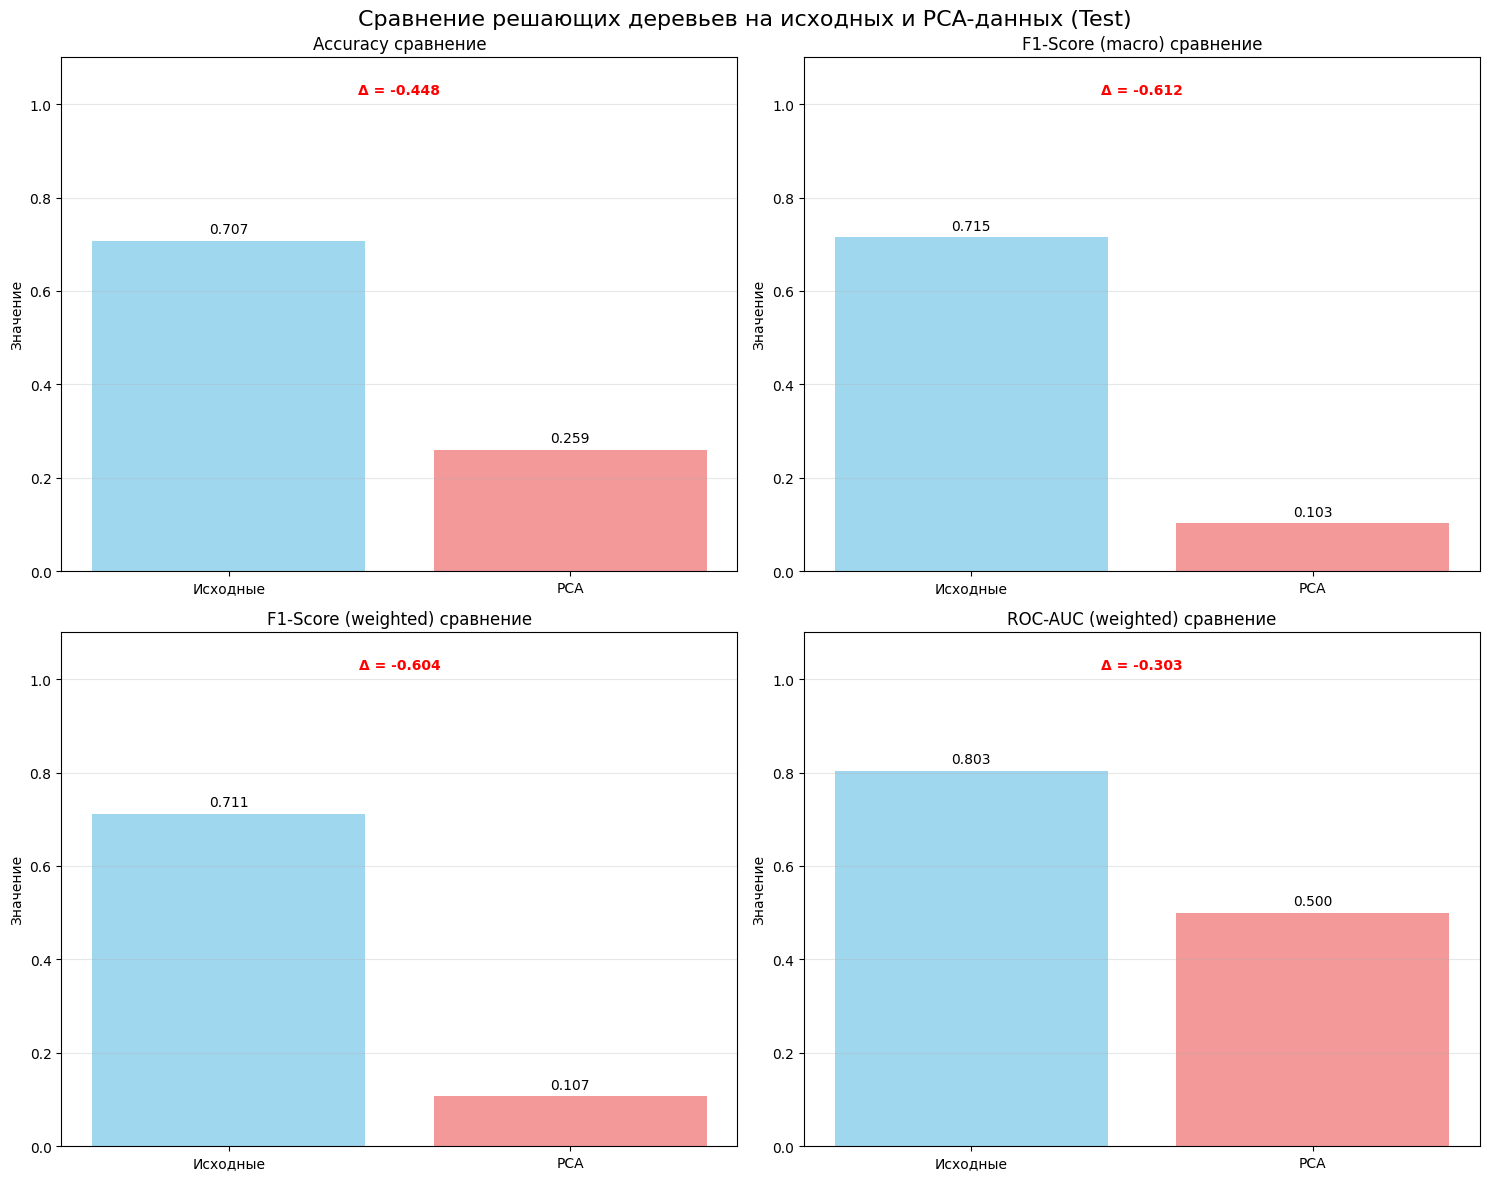


АНАЛИЗ ВЛИЯНИЯ MAX_DEPTH НА КАЧЕСТВО


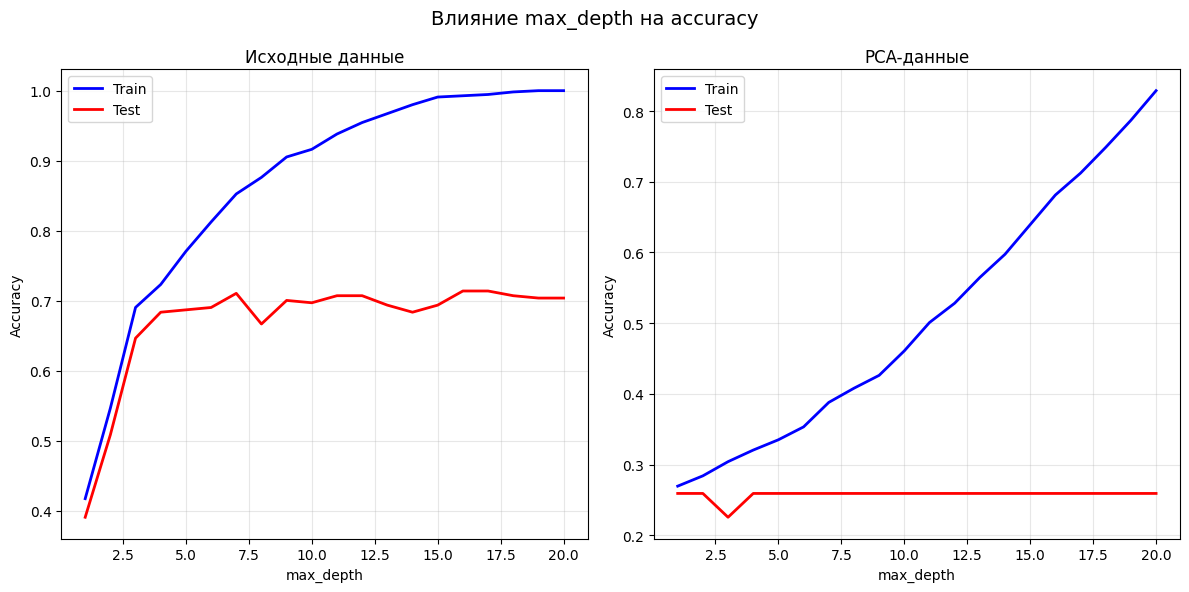


МАТРИЦЫ ОШИБОК СРАВНЕНИЕ


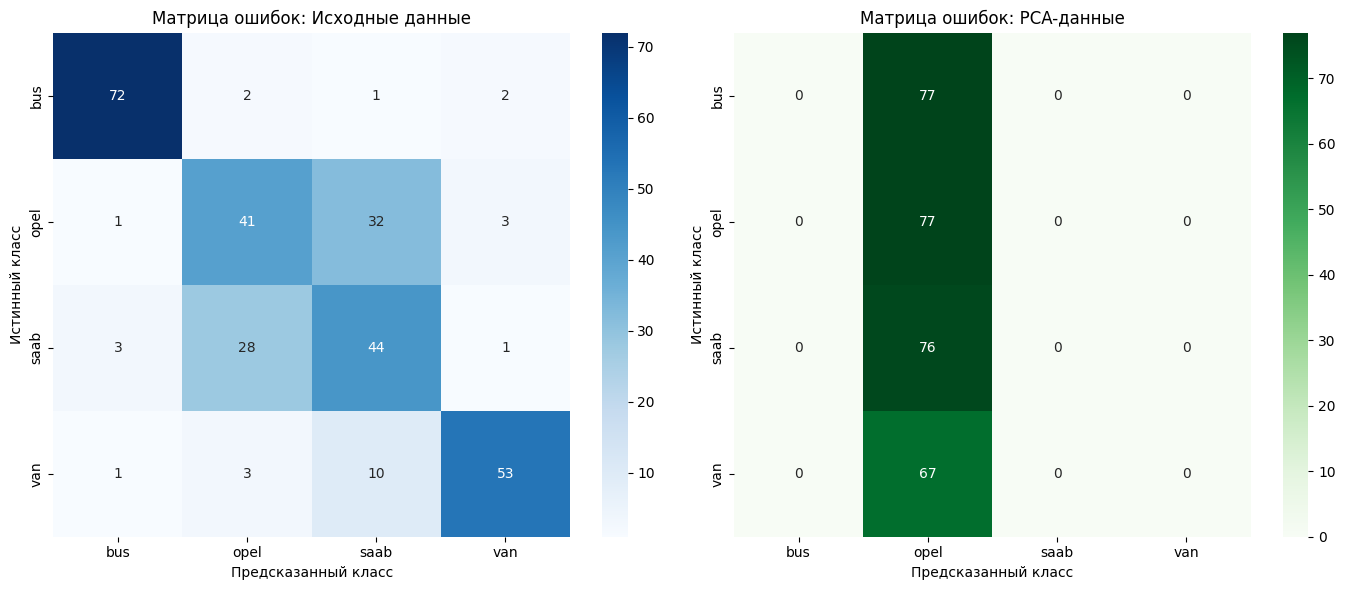


АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ

Топ-20 самых важных признаков (исходные данные):
   Признак  Важность
 Feature_6  0.203864
 Feature_8  0.159150
Feature_12  0.147791
 Feature_1  0.062357
 Feature_3  0.058070
Feature_15  0.049151
Feature_13  0.043324
 Feature_5  0.042935
Feature_16  0.039242
 Feature_2  0.031397
Feature_10  0.030932
Feature_14  0.030675
Feature_18  0.030588
 Feature_0  0.028013
Feature_11  0.012007
Feature_17  0.011285
 Feature_7  0.010295
 Feature_4  0.008923
 Feature_9  0.000000


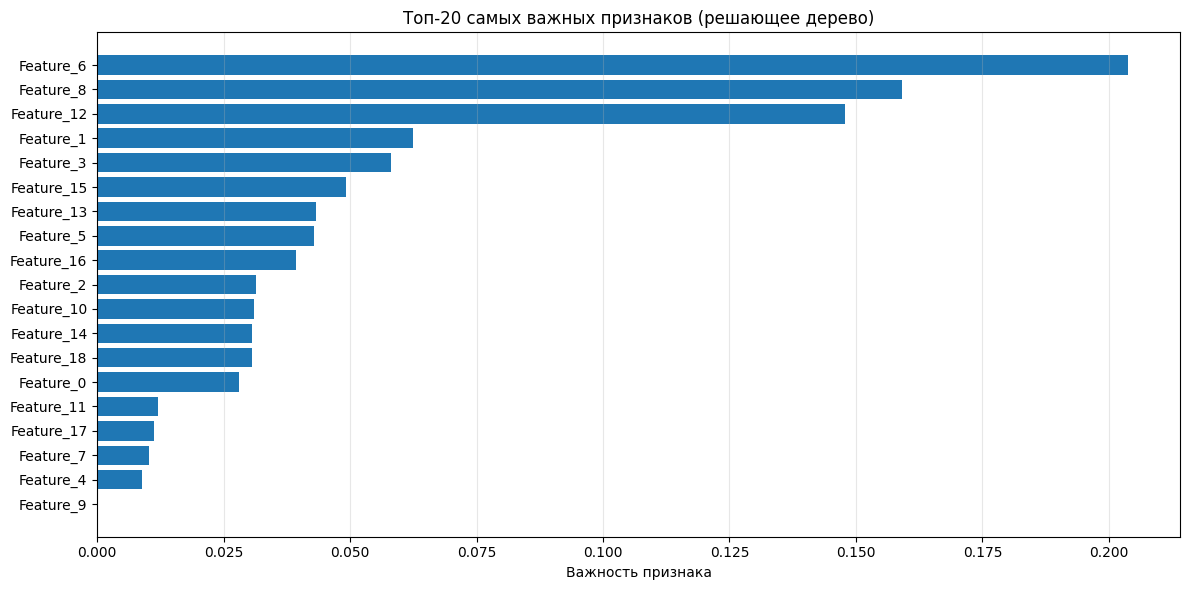


ДЕТАЛЬНЫЙ ОТЧЕТ И ВЫВОДЫ

1. Кросс-валидационные результаты:
   Исходные данные: лучшая accuracy = 0.6831
   PCA данные: лучшая accuracy = 0.2897

2. Оптимальные параметры:
   Исходные данные: max_depth = 18
   PCA данные: max_depth = 12

3. Разница в качестве на тестовых данных:
   Accuracy             0.7071 → 0.2593 (↓0.4478)
   F1-Score (macro)     0.7148 → 0.1029 (↓0.6119)
   F1-Score (weighted)  0.7111 → 0.1068 (↓0.6044)
   ROC-AUC (weighted)   0.8033 → 0.5000 (↓0.3033)

4. Переобучение (разница Train/Test):
   Исходные данные: 0.2929
   PCA данные: 0.2690

5. Рекомендации:
   ⚠ PCA не улучшило качество модели
   ⚠ Модель на исходных данных переобучается
   ⚠ Модель на PCA-данных переобучается

6. Оптимальная глубина дерева:
   Для исходных данных: 18
   Для PCA-данных: 12

ЗАКЛЮЧЕНИЕ

Лучшая модель достигнута на исходные данные
Лучшая accuracy на тесте: 0.7071
Accuracy случайного классификатора: 0.2500
Улучшение относительно случайного: 0.4571

ЭКСПЕРИМЕНТ ЗАВЕРШЕН


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                           classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("РЕШАЮЩЕЕ ДЕРЕВО: СРАВНЕНИЕ ИСХОДНЫХ И PCA-ДАННЫХ")
print("="*70)

# 1. ПОДГОТОВКА ДАННЫХ
print("\n1. Подготовка данных...")

# Проверяем, если y_train - строки, кодируем их
if isinstance(y_train.iloc[0] if hasattr(y_train, 'iloc') else y_train[0], str):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    classes = le.classes_
else:
    y_train_encoded = y_train
    y_test_encoded = y_test
    classes = np.unique(y_train_encoded)

print(f"   Количество классов: {len(classes)}")
print(f"   Классы: {classes}")

# Преобразуем X в numpy массивы если нужно
if hasattr(X_train, 'values'):
    X_train_np = X_train.values
    X_test_np = X_test.values
else:
    X_train_np = X_train
    X_test_np = X_test

# 2. СОЗДАНИЕ PCA-ПРЕОБРАЗОВАННЫХ ДАННЫХ
print("\n2. Создание PCA-преобразованных данных...")

# Масштабируем данные для PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

print(f"   Исходная размерность: {X_train_np.shape[1]} признаков")
print(f"   PCA размерность: {X_train_pca.shape[1]} компонент")
print(f"   Сохранено дисперсии: {pca.explained_variance_ratio_.sum():.3f}")

# 3. НАСТРОЙКА ПАРАМЕТРОВ ДЛЯ GRIDSEARCH
print("\n3. Настройка параметров GridSearchCV...")

# Диапазон значений max_depth для поиска
max_depth_range = list(range(1, 31)) + [None]  # от 1 до 30 + неограниченная

param_grid = {
    'max_depth': max_depth_range,
    'criterion': ['gini', 'entropy'],
}

# 4. ФУНКЦИЯ ДЛЯ ОБУЧЕНИЯ И ОЦЕНКИ
def train_and_evaluate_tree(X_train_data, X_test_data, data_name):
    """
    Обучает решающее дерево и оценивает его качество
    """
    print(f"\n{'='*70}")
    print(f"РЕШАЮЩЕЕ ДЕРЕВО НА {data_name.upper()} ДАННЫХ")
    print(f"{'='*70}")

    # Создаем модель решающего дерева
    tree = DecisionTreeClassifier(random_state=42)

    # Настройка GridSearchCV
    grid_search = GridSearchCV(
        estimator=tree,
        param_grid=param_grid,
        cv=5,  # 5-кратная кросс-валидация
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    print(f"   Выполняется GridSearchCV...")
    grid_search.fit(X_train_data, y_train_encoded)

    print(f"\n   Лучшие параметры:")
    best_params = grid_search.best_params_
    for param, value in best_params.items():
        print(f"     {param}: {value}")

    print(f"\n   Лучшая accuracy на кросс-валидации: {grid_search.best_score_:.4f}")

    # Обучаем модель с лучшими параметрами на всех train данных
    best_tree = grid_search.best_estimator_
    best_tree.fit(X_train_data, y_train_encoded)

    # Предсказания
    y_train_pred = best_tree.predict(X_train_data)
    y_test_pred = best_tree.predict(X_test_data)

    # Вероятности для ROC-AUC
    y_train_proba = best_tree.predict_proba(X_train_data)
    y_test_proba = best_tree.predict_proba(X_test_data)

    # Метрики качества
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

    # F1-Score для многоклассовой задачи
    train_f1_macro = f1_score(y_train_encoded, y_train_pred, average='macro')
    test_f1_macro = f1_score(y_test_encoded, y_test_pred, average='macro')

    train_f1_weighted = f1_score(y_train_encoded, y_train_pred, average='weighted')
    test_f1_weighted = f1_score(y_test_encoded, y_test_pred, average='weighted')

    # ROC-AUC для многоклассовой (One-vs-Rest)
    try:
        train_roc_auc = roc_auc_score(y_train_encoded, y_train_proba,
                                      multi_class='ovr', average='weighted')
        test_roc_auc = roc_auc_score(y_test_encoded, y_test_proba,
                                     multi_class='ovr', average='weighted')
    except:
        train_roc_auc = np.nan
        test_roc_auc = np.nan

    # Вывод метрик
    print(f"\n   МЕТРИКИ КАЧЕСТВА:")
    print(f"   {'Метрика':<25} {'Train':<10} {'Test':<10}")
    print(f"   {'-'*50}")
    print(f"   {'Accuracy':<25} {train_accuracy:.4f}     {test_accuracy:.4f}")
    print(f"   {'F1-Score (macro)':<25} {train_f1_macro:.4f}     {test_f1_macro:.4f}")
    print(f"   {'F1-Score (weighted)':<25} {train_f1_weighted:.4f}     {test_f1_weighted:.4f}")
    print(f"   {'ROC-AUC (weighted)':<25} {train_roc_auc:.4f}     {test_roc_auc:.4f}")

    # Classification report
    print(f"\n   Classification Report (Test):")
    print(classification_report(y_test_encoded, y_test_pred,
                                target_names=[str(c) for c in classes]))

    # Визуализация дерева (только если глубина <= 5)
    if best_params['max_depth'] is not None and best_params['max_depth'] <= 5:
        from sklearn.tree import plot_tree
        plt.figure(figsize=(20, 10))
        plot_tree(best_tree,
                  filled=True,
                  feature_names=[f'Feature_{i}' for i in range(X_train_data.shape[1])],
                  class_names=[str(c) for c in classes],
                  rounded=True,
                  fontsize=10)
        plt.title(f'Решающее дерево (max_depth={best_params["max_depth"]}) на {data_name} данных')
        plt.show()

    return {
        'model': best_tree,
        'best_params': best_params,
        'cv_score': grid_search.best_score_,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_f1_macro': train_f1_macro,
        'test_f1_macro': test_f1_macro,
        'train_f1_weighted': train_f1_weighted,
        'test_f1_weighted': test_f1_weighted,
        'train_roc_auc': train_roc_auc,
        'test_roc_auc': test_roc_auc,
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba
    }

# 5. ОБУЧЕНИЕ НА ИСХОДНЫХ ДАННЫХ
print("\n" + "="*70)
print("ОБУЧЕНИЕ НА ИСХОДНЫХ ДАННЫХ")
print("="*70)

results_original = train_and_evaluate_tree(X_train_np, X_test_np, "исходных")

# 6. ОБУЧЕНИЕ НА PCA-ДАННЫХ
print("\n" + "="*70)
print("ОБУЧЕНИЕ НА PCA-ДАННЫХ")
print("="*70)

results_pca = train_and_evaluate_tree(X_train_pca, X_test_pca, "PCA-преобразованных")

# 7. СРАВНИТЕЛЬНЫЙ АНАЛИЗ
print("\n" + "="*70)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*70)

# Создаем таблицу сравнения
comparison_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'F1-Score (macro)', 'F1-Score (weighted)', 'ROC-AUC (weighted)'],
    'Исходные (Train)': [
        results_original['train_accuracy'],
        results_original['train_f1_macro'],
        results_original['train_f1_weighted'],
        results_original['train_roc_auc']
    ],
    'Исходные (Test)': [
        results_original['test_accuracy'],
        results_original['test_f1_macro'],
        results_original['test_f1_weighted'],
        results_original['test_roc_auc']
    ],
    'PCA (Train)': [
        results_pca['train_accuracy'],
        results_pca['train_f1_macro'],
        results_pca['train_f1_weighted'],
        results_pca['train_roc_auc']
    ],
    'PCA (Test)': [
        results_pca['test_accuracy'],
        results_pca['test_f1_macro'],
        results_pca['test_f1_weighted'],
        results_pca['test_roc_auc']
    ]
})

print("\nСравнение метрик качества:")
print(comparison_df.to_string(index=False))

# 8. ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Accuracy сравнение
metrics_to_compare = ['Accuracy', 'F1-Score (macro)', 'F1-Score (weighted)', 'ROC-AUC (weighted)']
x = np.arange(len(metrics_to_compare))
width = 0.35

for i, metric in enumerate(metrics_to_compare):
    ax = axes[i//2, i%2]

    # Значения для тестовых данных
    orig_val = comparison_df.loc[comparison_df['Метрика'] == metric, 'Исходные (Test)'].values[0]
    pca_val = comparison_df.loc[comparison_df['Метрика'] == metric, 'PCA (Test)'].values[0]

    bars = ax.bar(['Исходные', 'PCA'], [orig_val, pca_val],
                  color=['skyblue', 'lightcoral'], alpha=0.8)

    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')

    ax.set_ylabel('Значение')
    ax.set_title(f'{metric} сравнение')
    ax.set_ylim([0, 1.1])
    ax.grid(True, alpha=0.3, axis='y')

    # Разница
    diff = pca_val - orig_val
    diff_color = 'green' if diff > 0 else 'red' if diff < 0 else 'gray'
    ax.text(0.5, 0.95, f'Δ = {diff:+.3f}', transform=ax.transAxes,
            ha='center', va='top', color=diff_color, fontweight='bold')

plt.suptitle('Сравнение решающих деревьев на исходных и PCA-данных (Test)', fontsize=16)
plt.tight_layout()
plt.show()

# 9. АНАЛИЗ ВЛИЯНИЯ MAX_DEPTH
print("\n" + "="*70)
print("АНАЛИЗ ВЛИЯНИЯ MAX_DEPTH НА КАЧЕСТВО")
print("="*70)

# Обучим деревья с разной глубиной для анализа
def analyze_depth_impact(X_train_data, X_test_data, data_name, max_depths=range(1, 21)):
    """
    Анализирует влияние max_depth на качество модели
    """
    train_scores = []
    test_scores = []

    for depth in max_depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        tree.fit(X_train_data, y_train_encoded)

        train_scores.append(accuracy_score(y_train_encoded, tree.predict(X_train_data)))
        test_scores.append(accuracy_score(y_test_encoded, tree.predict(X_test_data)))

    return train_scores, test_scores

# Анализ для исходных данных
max_depths = range(1, 21)
train_scores_orig, test_scores_orig = analyze_depth_impact(X_train_np, X_test_np, "исходных", max_depths)
train_scores_pca, test_scores_pca = analyze_depth_impact(X_train_pca, X_test_pca, "PCA", max_depths)

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depths, train_scores_orig, 'b-', label='Train', linewidth=2)
plt.plot(max_depths, test_scores_orig, 'r-', label='Test', linewidth=2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Исходные данные')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(max_depths, train_scores_pca, 'b-', label='Train', linewidth=2)
plt.plot(max_depths, test_scores_pca, 'r-', label='Test', linewidth=2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('PCA-данные')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Влияние max_depth на accuracy', fontsize=14)
plt.tight_layout()
plt.show()

# 10. МАТРИЦЫ ОШИБОК СРАВНЕНИЕ
print("\n" + "="*70)
print("МАТРИЦЫ ОШИБОК СРАВНЕНИЕ")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Матрица ошибок для исходных данных
cm_original = confusion_matrix(y_test_encoded, results_original['y_test_pred'])
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=classes, yticklabels=classes)
axes[0].set_title('Матрица ошибок: Исходные данные')
axes[0].set_xlabel('Предсказанный класс')
axes[0].set_ylabel('Истинный класс')

# Матрица ошибок для PCA данных
cm_pca = confusion_matrix(y_test_encoded, results_pca['y_test_pred'])
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=classes, yticklabels=classes)
axes[1].set_title('Матрица ошибок: PCA-данные')
axes[1].set_xlabel('Предсказанный класс')
axes[1].set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

# 11. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ (только для исходных данных)
print("\n" + "="*70)
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")
print("="*70)

# Получаем важность признаков из лучшего дерева на исходных данных
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f'Feature_{i}' for i in range(X_train_np.shape[1])]

feature_importances = results_original['model'].feature_importances_

# Сортируем признаки по важности
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importances
}).sort_values('Важность', ascending=False).head(20)  # Топ-20 признаков

print("\nТоп-20 самых важных признаков (исходные данные):")
print(importance_df.to_string(index=False))

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.barh(range(len(importance_df)), importance_df['Важность'][::-1])
plt.yticks(range(len(importance_df)), importance_df['Признак'][::-1])
plt.xlabel('Важность признака')
plt.title('Топ-20 самых важных признаков (решающее дерево)')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# 12. ДЕТАЛЬНЫЙ ОТЧЕТ
print("\n" + "="*70)
print("ДЕТАЛЬНЫЙ ОТЧЕТ И ВЫВОДЫ")
print("="*70)

print(f"\n1. Кросс-валидационные результаты:")
print(f"   Исходные данные: лучшая accuracy = {results_original['cv_score']:.4f}")
print(f"   PCA данные: лучшая accuracy = {results_pca['cv_score']:.4f}")

print(f"\n2. Оптимальные параметры:")
print(f"   Исходные данные: max_depth = {results_original['best_params']['max_depth']}")
print(f"   PCA данные: max_depth = {results_pca['best_params']['max_depth']}")

print(f"\n3. Разница в качестве на тестовых данных:")
for metric in ['Accuracy', 'F1-Score (macro)', 'F1-Score (weighted)', 'ROC-AUC (weighted)']:
    orig_val = comparison_df.loc[comparison_df['Метрика'] == metric, 'Исходные (Test)'].values[0]
    pca_val = comparison_df.loc[comparison_df['Метрика'] == metric, 'PCA (Test)'].values[0]
    diff = pca_val - orig_val
    diff_symbol = "↑" if diff > 0 else "↓" if diff < 0 else "→"
    print(f"   {metric:<20} {orig_val:.4f} → {pca_val:.4f} ({diff_symbol}{abs(diff):.4f})")

print(f"\n4. Переобучение (разница Train/Test):")
orig_overfit = results_original['train_accuracy'] - results_original['test_accuracy']
pca_overfit = results_pca['train_accuracy'] - results_pca['test_accuracy']
print(f"   Исходные данные: {orig_overfit:.4f}")
print(f"   PCA данные: {pca_overfit:.4f}")

print(f"\n5. Рекомендации:")
if results_pca['test_accuracy'] > results_original['test_accuracy']:
    print("   ✓ PCA улучшило качество модели")
else:
    print("   ⚠ PCA не улучшило качество модели")

if orig_overfit > 0.1:
    print("   ⚠ Модель на исходных данных переобучается")
if pca_overfit > 0.1:
    print("   ⚠ Модель на PCA-данных переобучается")

print(f"\n6. Оптимальная глубина дерева:")
print(f"   Для исходных данных: {results_original['best_params']['max_depth']}")
print(f"   Для PCA-данных: {results_pca['best_params']['max_depth']}")

# 13. ФИНАЛЬНЫЙ ВЫВОД
print("\n" + "="*70)
print("ЗАКЛЮЧЕНИЕ")
print("="*70)

# Определяем лучшую модель
if results_pca['test_accuracy'] > results_original['test_accuracy']:
    best_model_type = "PCA-данные"
    best_accuracy = results_pca['test_accuracy']
else:
    best_model_type = "исходные данные"
    best_accuracy = results_original['test_accuracy']

print(f"\nЛучшая модель достигнута на {best_model_type}")
print(f"Лучшая accuracy на тесте: {best_accuracy:.4f}")

# Сравнение со случайным классификатором
random_accuracy = 1 / len(classes)
print(f"Accuracy случайного классификатора: {random_accuracy:.4f}")
print(f"Улучшение относительно случайного: {best_accuracy - random_accuracy:.4f}")

print("\n" + "="*70)
print("ЭКСПЕРИМЕНТ ЗАВЕРШЕН")
print("="*70)

#### 2.6. Bagging.
Перейдем к ансамблям.

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья.

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?


BAGGING С ЛОГИСТИЧЕСКОЙ РЕГРЕССИЕЙ
test_roc_score=np.float64(0.8762631712410833)
train_roc_score=np.float64(0.9135443903110337)
  n_estimators= 2: test_accuracy=0.694, oob_score=0.545
test_roc_score=np.float64(0.8777610249593509)
train_roc_score=np.float64(0.9147149682040455)
test_roc_score=np.float64(0.8804167712212353)
train_roc_score=np.float64(0.9155225207467436)
test_roc_score=np.float64(0.879314535731648)
train_roc_score=np.float64(0.9159376345489555)
test_roc_score=np.float64(0.8792663066436608)
train_roc_score=np.float64(0.9157851619467962)
test_roc_score=np.float64(0.8800945835705193)
train_roc_score=np.float64(0.9161986097862075)
  n_estimators=12: test_accuracy=0.690, oob_score=0.741
test_roc_score=np.float64(0.880815216713845)
train_roc_score=np.float64(0.9165923881860788)
test_roc_score=np.float64(0.8817917006826564)
train_roc_score=np.float64(0.91678144494034)
test_roc_score=np.float64(0.8824476349470536)
train_roc_score=np.float64(0.9168001177812891)
test_roc_score=np.f

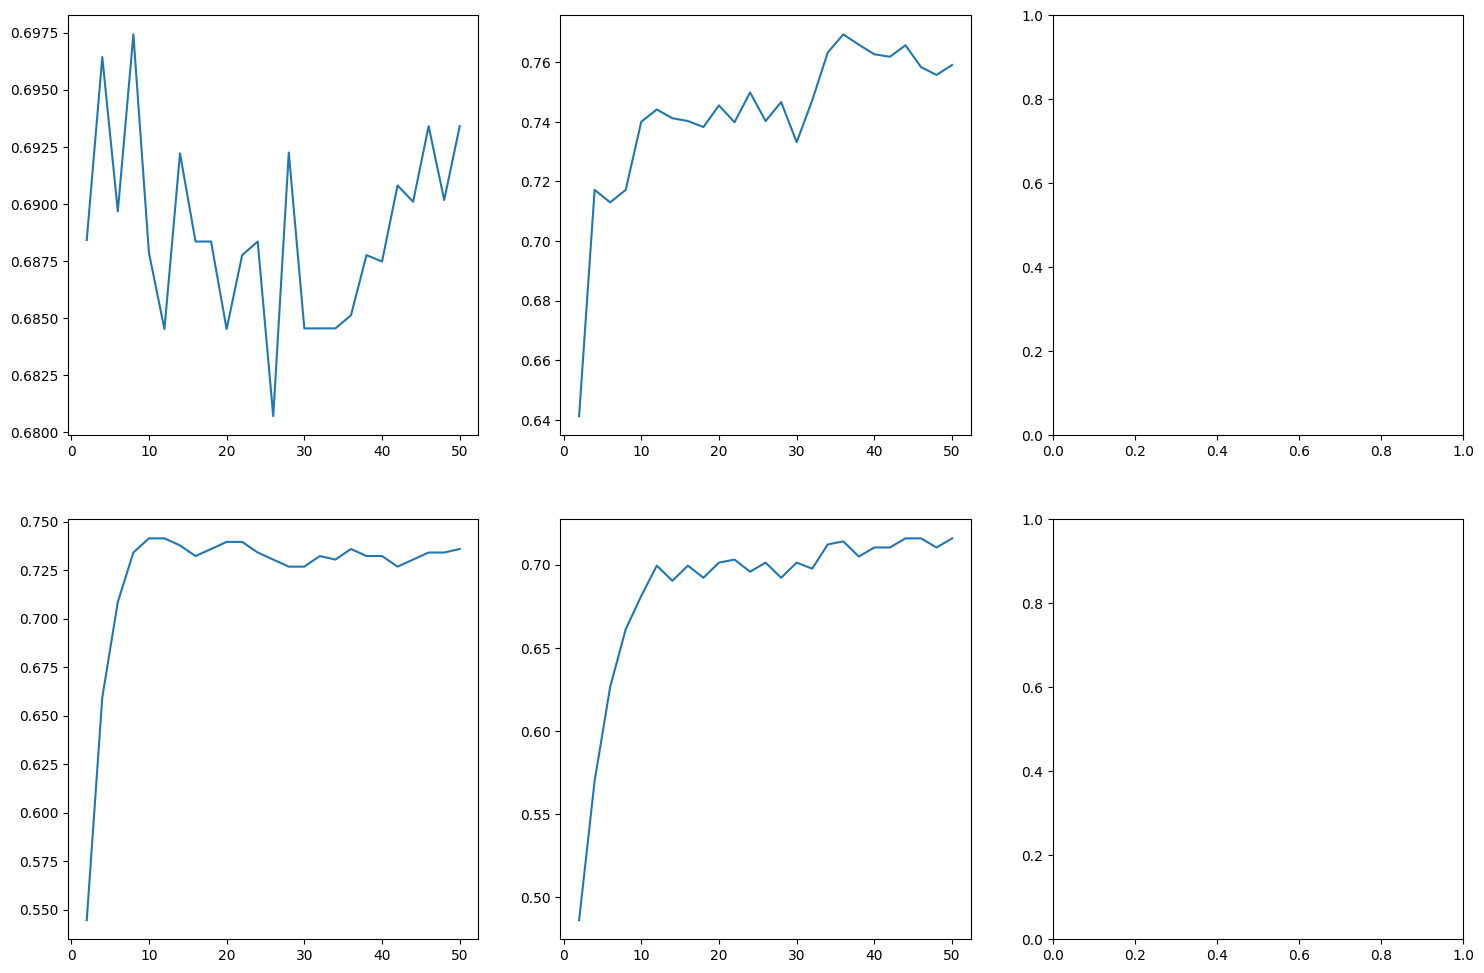

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

if isinstance(y_train.iloc[0] if hasattr(y_train, 'iloc') else y_train[0], str):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    classes = le.classes_
else:
    y_train_encoded = y_train
    y_test_encoded = y_test
    classes = np.unique(y_train_encoded)


best_tree_params = {'criterion': 'gini',
     'max_depth': 12,}
best_lr_params = {'C': 100,
  'class_weight': 'balanced',
  'max_iter': 1000,
  'multi_class': 'ovr',
  'penalty': 'l2',
  'solver': 'saga'}

base_lr = LogisticRegression(**best_lr_params, random_state=42)
base_tree = DecisionTreeClassifier(**best_tree_params, random_state=42)

def evaluate_ensemble(base_estimator, n_estimators_list, X_train, X_test, y_train, y_test):
    results = {
        'n_estimators': [],
        'train_accuracy': [],
        'test_accuracy': [],
        'train_roc_auc': [],
        'test_roc_auc': [],
        'f1_score': [],
        'oob_score': []  # Out-of-Bag score
    }

    best_oob_score = -1
    best_n_estimators = None

    for i, n_estimators in enumerate(n_estimators_list):
        bagging = BaggingClassifier(
            estimator=base_estimator,
            n_estimators=n_estimators,
            oob_score=True,
            random_state=42
        )

        bagging.fit(X_train, y_train)

        y_train_pred = bagging.predict(X_train)
        y_test_pred = bagging.predict(X_test)

        y_train_proba = bagging.predict_proba(X_train)
        y_test_proba = bagging.predict_proba(X_test)

        test_roc_score = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
        train_roc_score = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')
        print(f'{test_roc_score=}')
        print(f'{train_roc_score=}')

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
        test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
        results['n_estimators'].append(n_estimators)
        results['train_accuracy'].append(train_accuracy)
        results['test_accuracy'].append(test_accuracy)
        results['train_roc_auc'].append(train_roc_score)
        results['test_roc_auc'].append(test_roc_score)
        results['f1_score'].append(test_f1_macro)
        results['oob_score'].append(bagging.oob_score_ if hasattr(bagging, 'oob_score_') else np.nan)

        if hasattr(bagging, 'oob_score_') and bagging.oob_score_ > best_oob_score:
            best_oob_score = bagging.oob_score_
            best_n_estimators = n_estimators

        # Прогресс
        if i % 5 == 0 or i == len(n_estimators_range):
            print(f"  n_estimators={n_estimators:2d}: "
                  f"test_accuracy={test_accuracy:.3f}, "
                  f"oob_score={bagging.oob_score_ if hasattr(bagging, 'oob_score_') else 'N/A':.3f}")

    results_df = pd.DataFrame(results)

    print(f"\nЛучший OOB score: {best_oob_score:.4f} при n_estimators={best_n_estimators}")

    return results_df, bagging if 'bagging' in locals() else None


print("\n" + "="*80)
print("BAGGING С ЛОГИСТИЧЕСКОЙ РЕГРЕССИЕЙ")
print("="*80)
n_estimators_range = list(range(2, 51, 2))  # От 2 до 50 с шагом 2
results_lr, final_bagging_lr = evaluate_ensemble(
    base_estimator=base_lr,
    n_estimators_list=n_estimators_range,
    X_train=X_train,
    y_train=y_train_encoded,
    X_test=X_test,
    y_test=y_test_encoded
)

print("\n" + "="*80)
print("BAGGING С РЕШАЮЩИМ ДЕРЕВОМ")
print("="*80)

results_tree, final_bagging_tree = evaluate_ensemble(
    base_estimator=base_tree,
    n_estimators_list=n_estimators_range,
    X_train=X_train,
    y_train=y_train_encoded,
    X_test=X_test,
    y_test=y_test_encoded
)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes[0, 0].plot(results_lr['n_estimators'], results_lr['f1_score'])
axes[0, 1].plot(results_tree['n_estimators'], results_tree['f1_score'])
axes[1, 0].plot(results_lr['n_estimators'], results_lr['oob_score'])
axes[1, 1].plot(results_tree['n_estimators'], results_tree['oob_score'])
plt.show()



#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest.

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?


BAGGING С ЛОГИСТИЧЕСКОЙ РЕГРЕССИЕЙ
test_roc_score=np.float64(0.7631268592143614)
train_roc_score=np.float64(0.9020980444177447)
test_roc_score=np.float64(0.837083671834937)
train_roc_score=np.float64(0.968502216270866)
test_roc_score=np.float64(0.8675149412747177)
train_roc_score=np.float64(0.9934796901030892)
test_roc_score=np.float64(0.8947413612238498)
train_roc_score=np.float64(0.998267788688569)
test_roc_score=np.float64(0.8983738132292647)
train_roc_score=np.float64(0.9992978088263331)
test_roc_score=np.float64(0.9002309641840016)
train_roc_score=np.float64(0.9996344871178489)
test_roc_score=np.float64(0.9011182206437861)
train_roc_score=np.float64(0.9994749531825399)
test_roc_score=np.float64(0.9007335284280122)
train_roc_score=np.float64(0.9998629329638915)
test_roc_score=np.float64(0.9071957897165727)
train_roc_score=np.float64(0.9999159979286464)
test_roc_score=np.float64(0.9074412121687719)
train_roc_score=np.float64(0.9999404576407827)
test_roc_score=np.float64(0.909805591

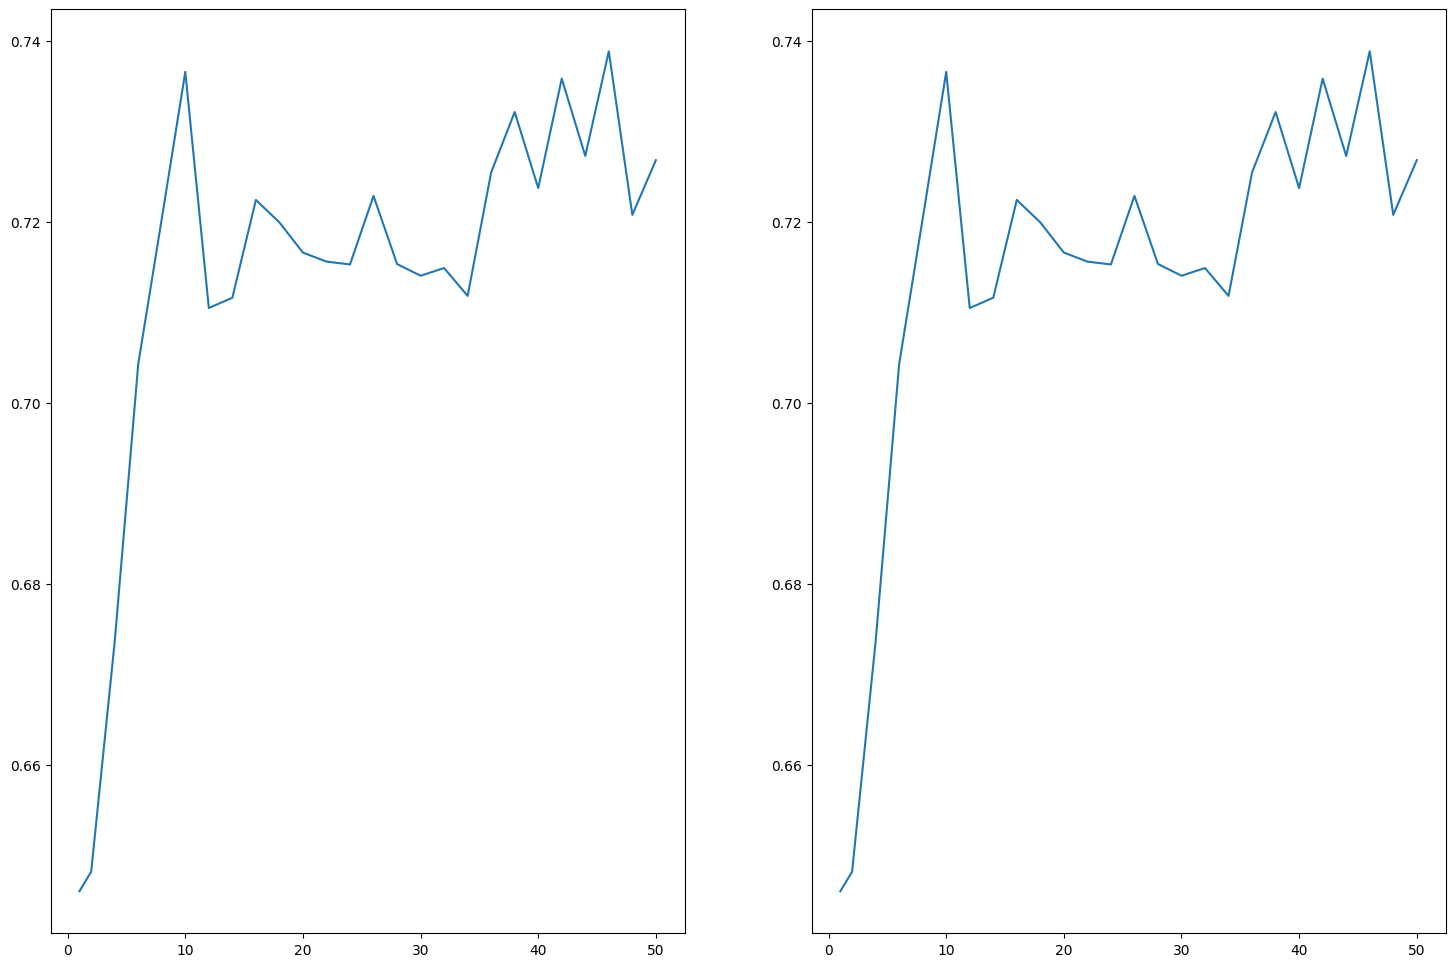

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                           classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

if isinstance(y_train.iloc[0] if hasattr(y_train, 'iloc') else y_train[0], str):
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    classes = le.classes_
else:
    y_train_encoded = y_train
    y_test_encoded = y_test
    classes = np.unique(y_train_encoded)




def evaluate_forest(n_estimators_list, X_train, X_test, y_train, y_test):
    results = {
        'n_estimators': [],
        'train_accuracy': [],
        'test_accuracy': [],
        'train_roc_auc': [],
        'test_roc_auc': [],
        'f1_score': [],
        'oob_score': []  # Out-of-Bag score
    }

    best_oob_score = -1
    best_n_estimators = None

    for i, n_estimators in enumerate(n_estimators_list):
        forest = RandomForestClassifier(
            n_estimators=n_estimators,
            oob_score=True,
            random_state=42
        )

        forest.fit(X_train, y_train)

        y_train_pred = forest.predict(X_train)
        y_test_pred = forest.predict(X_test)

        y_train_proba = forest.predict_proba(X_train)
        y_test_proba = forest.predict_proba(X_test)

        test_roc_score = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='weighted')
        train_roc_score = roc_auc_score(y_train, y_train_proba, multi_class='ovr', average='weighted')
        print(f'{test_roc_score=}')
        print(f'{train_roc_score=}')

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
        test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
        results['n_estimators'].append(n_estimators)
        results['train_accuracy'].append(train_accuracy)
        results['test_accuracy'].append(test_accuracy)
        results['train_roc_auc'].append(train_roc_score)
        results['test_roc_auc'].append(test_roc_score)
        results['f1_score'].append(test_f1_macro)
        results['oob_score'].append(forest.oob_score_ if hasattr(forest, 'oob_score_') else np.nan)

        if hasattr(forest, 'oob_score_') and forest.oob_score_ > best_oob_score:
            best_oob_score = forest.oob_score_
            best_n_estimators = n_estimators

        # Прогресс
        # if i % 5 == 0 or i == len(n_estimators_range):
        #     print(f"  n_estimators={n_estimators:2d}: "
        #           f"test_accuracy={test_accuracy:.3f}, "
        #           f"oob_score={forest.oob_score_ if hasattr(forest, 'oob_score_') else 'N/A':.3f}")

    results_df = pd.DataFrame(results)

    print(f"\nЛучший OOB score: {best_oob_score:.4f} при n_estimators={best_n_estimators}")

    return results_df, forest if 'forest' in locals() else None


print("\n" + "="*80)
print("BAGGING С ЛОГИСТИЧЕСКОЙ РЕГРЕССИЕЙ")
print("="*80)
n_estimators_range = [1] + list(range(2, 51, 2))  # От 2 до 50 с шагом 2
result_forest, _ = evaluate_forest(
    n_estimators_list=n_estimators_range,
    X_train=X_train,
    y_train=y_train_encoded,
    X_test=X_test,
    y_test=y_test_encoded
)

fig, axes = plt.subplots(1, 2, figsize=(18, 12))
axes[0].plot(result_forest['n_estimators'], result_forest['f1_score'])
axes[1].plot(result_forest['n_estimators'], result_forest['f1_score'])
plt.show()

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
# YOUR CODE HERE